In [ ]:
!unzip /content/aviacompany.zip

Archive:  /content/aviacompany.zip
  inflating: sample_submission.csv   
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/test_dataset.csv")

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [ ]:
df.shape

(4000, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [ ]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,3981.000000
mean,2000.500000,39.886750,1217.960000,2.768250,3.021250,2.788500,2.979500,3.279750,3.358000,3.514250,3.412000,3.405750,3.379750,3.631250,3.334500,3.679500,3.349750,13.86525,14.157749
std,1154.844867,14.748519,1012.709063,1.380948,1.554478,1.448721,1.286466,1.331703,1.350664,1.319179,1.322382,1.275352,1.346103,1.187487,1.257778,1.184749,1.319796,35.48267,35.831589
min,1.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000
25%,1000.750000,27.000000,416.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,2000.500000,40.000000,868.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.00000,0.000000
75%,3000.250000,51.000000,1750.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.00000,12.000000
max,4000.000000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,624.00000,615.000000


In [ ]:
loyal_rate = df['Customer Type'].value_counts()/len(df)*100 #percentage of customers who are churned or unchurned
loyal_rate

,count
Customer Type,
Loyal Customer,81.6
disloyal Customer,18.4


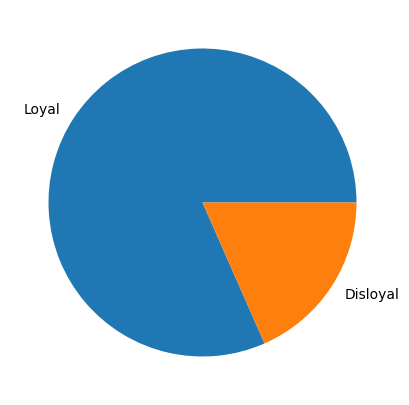

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(loyal_rate, labels=['Loyal','Disloyal'])
plt.show()

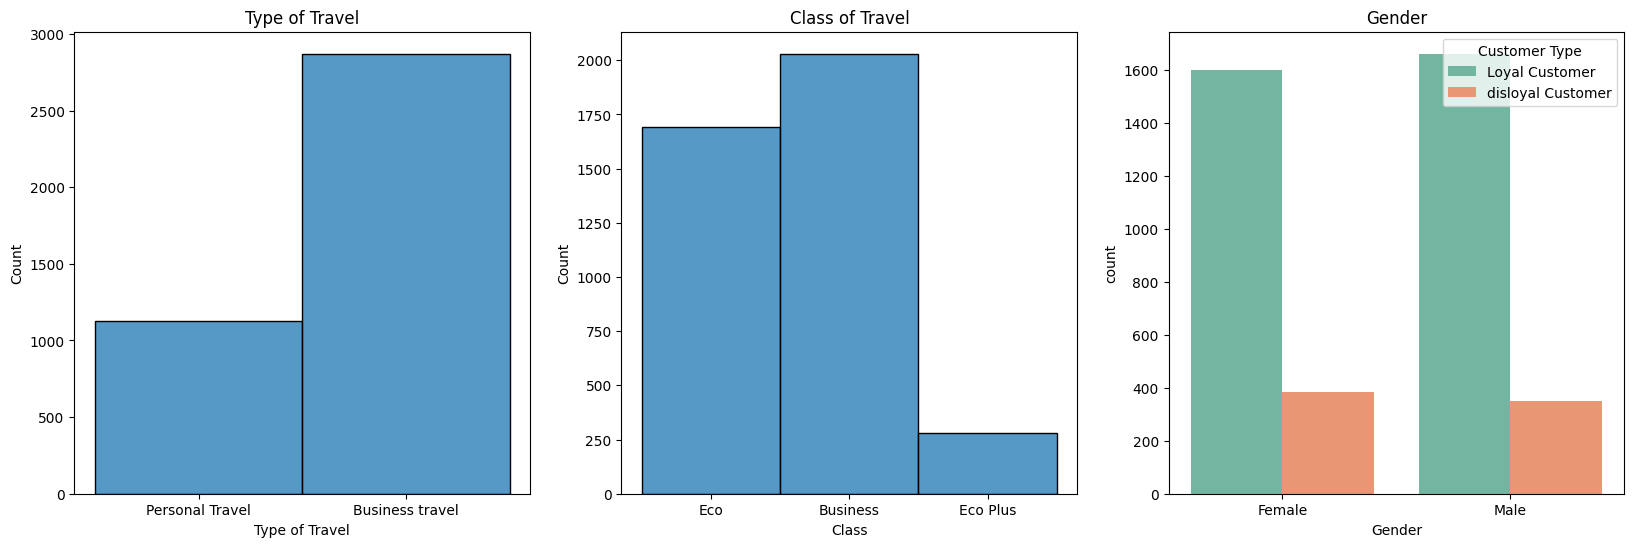

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,6))


# Type of Travel
sns.histplot(x="Type of Travel", data=df, ax=axes[0])
axes[0].set_title("Type of Travel")

#	Class of Travel
sns.histplot(x="Class", data=df, ax=axes[1])
axes[1].set_title("Class of Travel")

#Gender
sns.countplot(x='Gender', hue='Customer Type',  palette='Set2', data=df, ax=axes[2])
axes[2].set_title("Gender") # Reference the single axes object


plt.show()

In [ ]:
df['Gender'].value_counts()

#changing values
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [ ]:
df['Customer Type'].value_counts()

#changing values
df['Customer Type'] = df['Customer Type'].replace({'disloyal Customer':0, 'Loyal Customer':1})

In [ ]:
df['Type of Travel'].value_counts()

#changing values
df['Type of Travel'] = df['Type of Travel'].replace({'Personal Travel':0, 'Business travel':1})

In [ ]:
df['Class'].value_counts()

#changing values
df['Class'] = df['Class'].replace({'Eco':0, 'Eco Plus':1, 'Business':2})

In [ ]:
df.sample(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
3381,3382,1,1,62,1,2,3179,1,1,1,...,4,4,4,4,4,4,4,4,0,0.0
874,875,1,0,42,1,2,435,5,5,5,...,3,3,3,4,5,3,4,3,0,0.0
695,696,1,1,48,0,0,782,4,5,4,...,5,5,4,5,5,4,4,5,0,0.0
3120,3121,1,1,18,0,0,529,3,2,1,...,3,3,4,3,3,2,2,3,22,25.0
3928,3929,1,1,47,1,1,2218,2,5,3,...,3,3,4,1,2,4,3,3,0,0.0
1665,1666,0,1,42,1,2,1617,3,3,3,...,4,4,4,4,4,4,4,4,63,60.0
3654,3655,0,1,39,1,2,2224,4,3,3,...,4,3,3,4,4,2,3,4,0,0.0
2174,2175,1,0,23,1,2,158,0,5,0,...,2,2,4,4,4,3,4,2,0,0.0
1256,1257,1,1,46,1,2,1747,1,1,1,...,5,4,4,4,4,3,4,5,4,0.0
1988,1989,1,1,12,0,0,1203,3,5,3,...,3,3,4,1,3,3,3,3,0,0.0


In [ ]:
df.corrwith(df['Customer Type']).abs().sort_values(ascending=False)

,0
Customer Type,1.000000
Age,0.331314
Type of Travel,0.287745
Flight Distance,0.235965
Seat comfort,0.170461
Departure/Arrival time convenient,0.170458
Online boarding,0.169831
Class,0.141275
Inflight entertainment,0.104049
Cleanliness,0.088208


In [ ]:
#We drop less 10% corr columns

columns_to_keep = ['Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
                   'Seat comfort', 'Departure/Arrival time convenient',
                   'Online boarding', 'Class', 'Inflight entertainment']
data = df[columns_to_keep]

In [ ]:
data.head()

,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Online boarding,Class,Inflight entertainment
0,1,25,0,2704,5,2,3,0,2
1,1,49,1,1623,4,1,4,2,2
2,1,51,1,338,5,4,5,2,5
3,1,34,1,95,1,0,0,1,5
4,1,34,0,602,5,4,5,0,5


In [ ]:
corr_matrix = data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Online boarding,Class,Inflight entertainment
Customer Type,1.000000,0.331314,0.287745,0.235965,0.170461,0.170458,0.169831,0.141275,0.104049
Age,0.331314,1.000000,0.010100,0.113174,0.173448,0.022847,0.185714,0.131676,0.087541
Type of Travel,0.287745,0.010100,1.000000,0.280792,0.156898,0.237290,0.252604,0.542095,0.193720
Flight Distance,0.235965,0.113174,0.280792,1.000000,0.168136,0.010653,0.208591,0.460380,0.125747
Seat comfort,0.170461,0.173448,0.156898,0.168136,1.000000,0.023814,0.420137,0.232326,0.619332
Departure/Arrival time convenient,0.170458,0.022847,0.237290,0.010653,0.023814,1.000000,0.077007,0.065828,0.006567
Online boarding,0.169831,0.185714,0.252604,0.208591,0.420137,0.077007,1.000000,0.322472,0.275253
Class,0.141275,0.131676,0.542095,0.460380,0.232326,0.065828,0.322472,1.000000,0.212410
Inflight entertainment,0.104049,0.087541,0.193720,0.125747,0.619332,0.006567,0.275253,0.212410,1.000000


In [ ]:
data = data.dropna()
data.shape

(4000, 9)

In [ ]:
#Last check(if you want, no need!)

encoded = pd.get_dummies(data)
encoded.head()

,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Online boarding,Class,Inflight entertainment
0,1,25,0,2704,5,2,3,0,2
1,1,49,1,1623,4,1,4,2,2
2,1,51,1,338,5,4,5,2,5
3,1,34,1,95,1,0,0,1,5
4,1,34,0,602,5,4,5,0,5


In [ ]:
X = encoded.drop("Customer Type", axis=1)
y = encoded['Customer Type']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.00949875, -1.5946656 ,  1.4675743 , ..., -0.26508804,
        -1.1290494 , -1.06790393],
       [ 0.61798677,  0.62709072,  0.40000693, ...,  0.47538135,
         0.9526273 , -1.06790393],
       [ 0.75361056,  0.62709072, -0.86902552, ...,  1.21585073,
         0.9526273 ,  1.20101376],
       ...,
       [-0.1279441 ,  0.62709072, -0.60830601, ..., -1.00555743,
        -1.1290494 , -1.06790393],
       [-1.14512254,  0.62709072, -0.23697823, ...,  0.47538135,
        -1.1290494 ,  1.20101376],
       [-1.00949875,  0.62709072, -0.13032025, ..., -0.26508804,
        -1.1290494 , -1.82420982]])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

`**LOGISTIC REGRESSION**`

In [ ]:
# Logistic regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Accuracy of the model
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66       147
           1       0.91      0.96      0.93       653

    accuracy                           0.89       800
   macro avg       0.83      0.77      0.80       800
weighted avg       0.88      0.89      0.88       800

Accuracy: 0.89


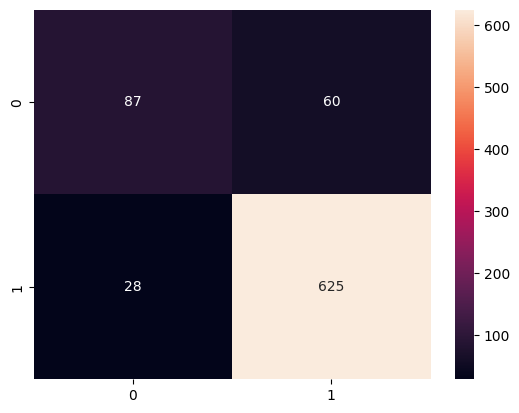

In [ ]:
# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

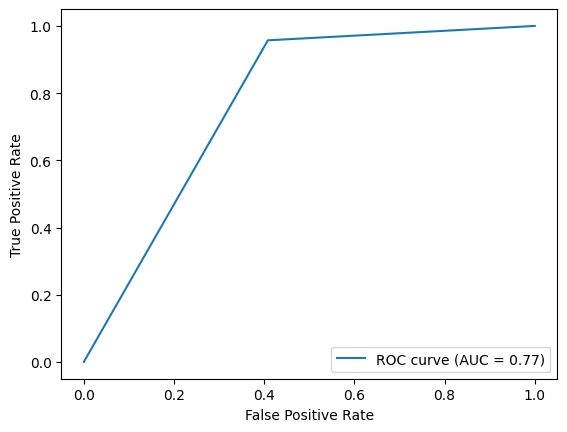

In [ ]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**`SVM`**

In [ ]:
#SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
#Accuracy
from sklearn.metrics import classification_report, accuracy_score # Import necessary functions

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71       147
           1       0.92      0.98      0.95       653

    accuracy                           0.91       800
   macro avg       0.88      0.79      0.83       800
weighted avg       0.91      0.91      0.90       800

Model aniqligi: 0.90875


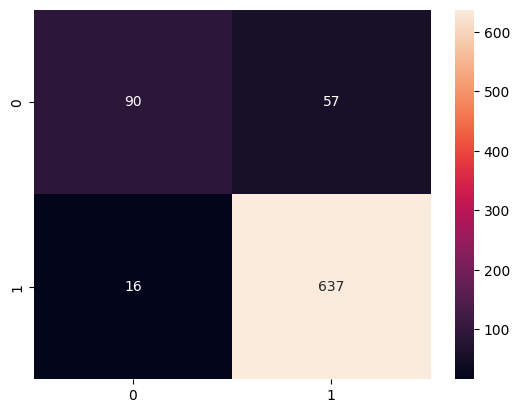

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix # Import the missing function
import seaborn as sns # Import seaborn for heatmap
import matplotlib.pyplot as plt # Import matplotlib for plotting

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

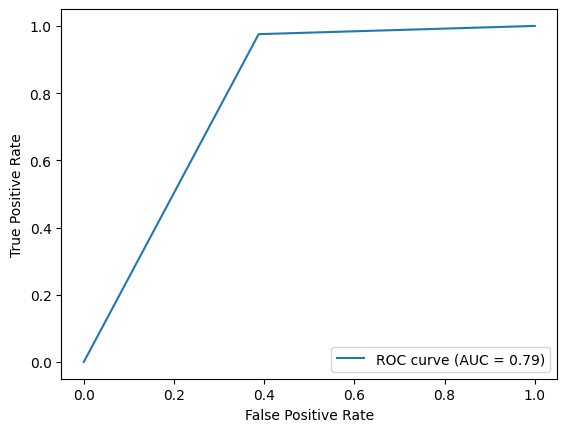

In [ ]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**`DECISION TREE`**

In [ ]:
#Decision Tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Accuracy

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       147
           1       0.95      0.95      0.95       653

    accuracy                           0.92       800
   macro avg       0.86      0.87      0.87       800
weighted avg       0.92      0.92      0.92       800

Model aniqligi: 0.91875


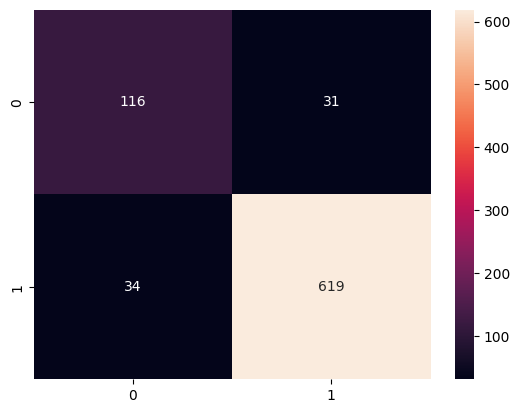

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

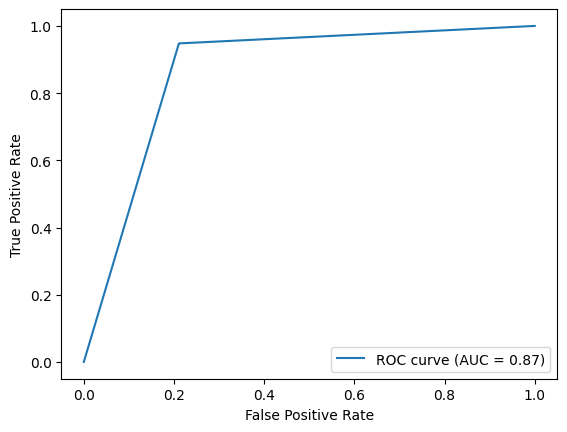

In [ ]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

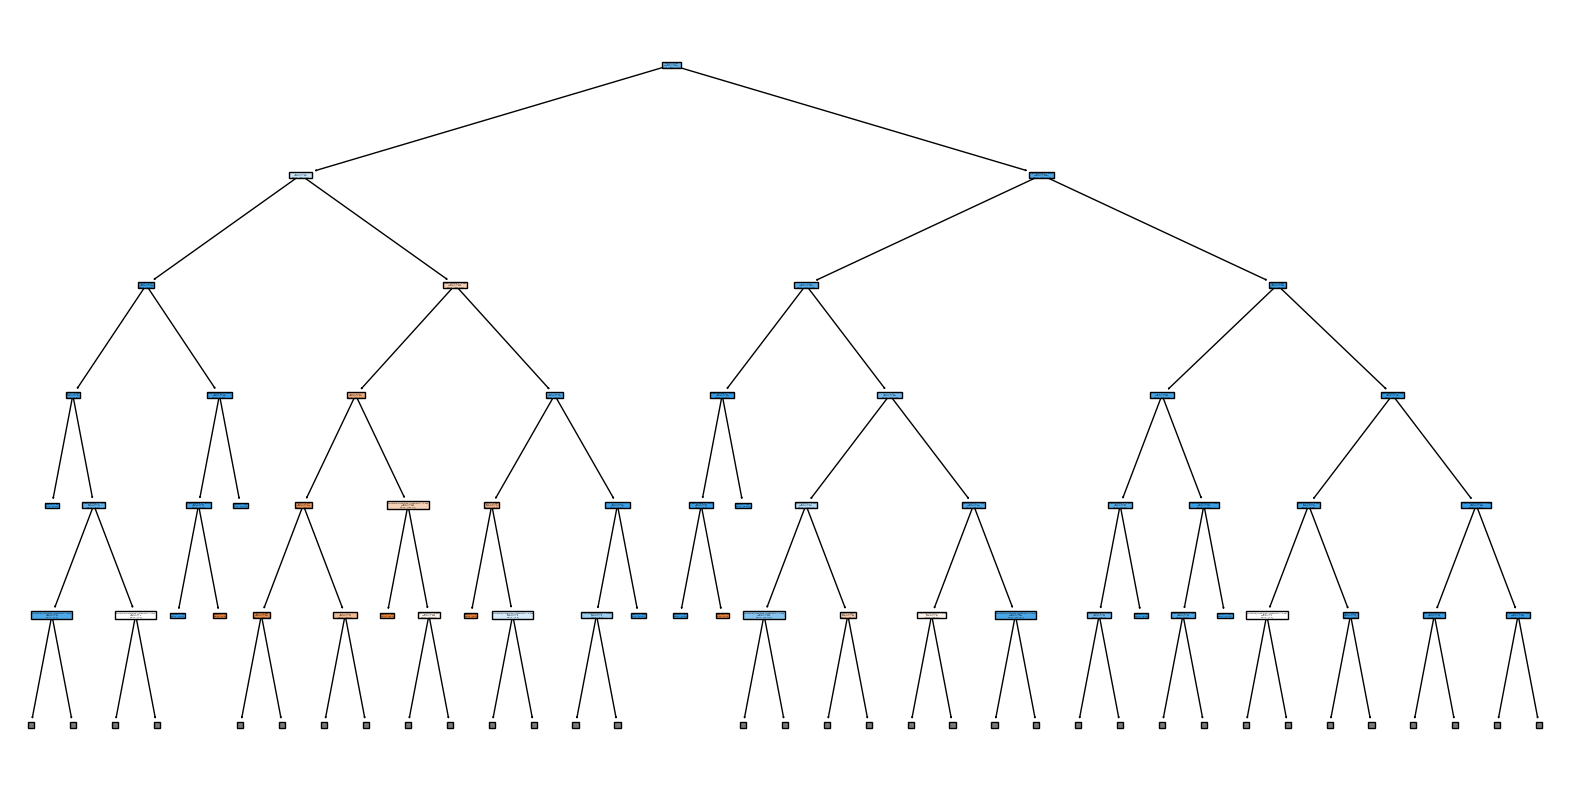

In [ ]:
cols = encoded.drop('Customer Type', axis=1).columns

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=cols, filled=True, max_depth=5)
plt.show()

**`RANDOM FOREST`**

In [ ]:
#Random Forest

RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9)

In [ ]:
#accuracy

y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       147
           1       0.94      0.98      0.96       653

    accuracy                           0.94       800
   macro avg       0.92      0.85      0.88       800
weighted avg       0.93      0.94      0.93       800

Model aniqligi: 0.935


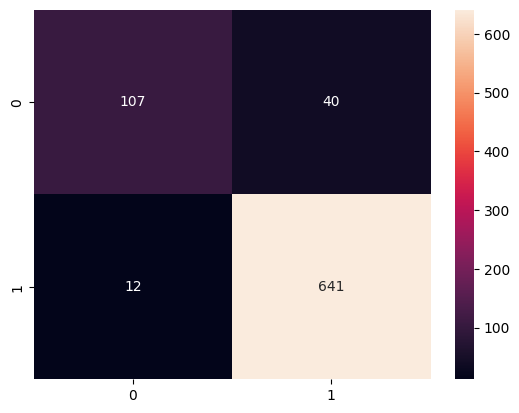

In [ ]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

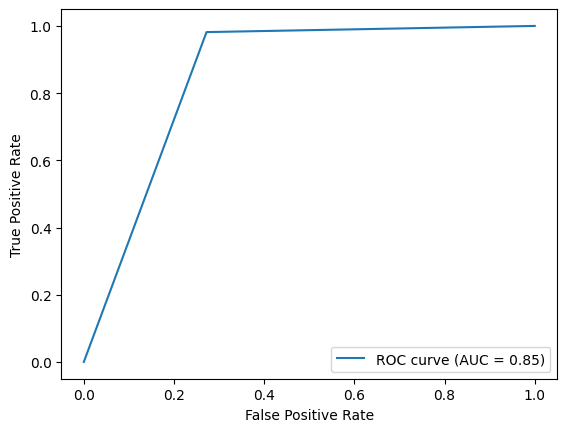

In [ ]:
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**`XGBoost`**

In [ ]:
#XGBoost

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#accuracy

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       147
           1       0.95      0.98      0.97       653

    accuracy                           0.95       800
   macro avg       0.94      0.88      0.91       800
weighted avg       0.95      0.95      0.95       800

Model aniqligi: 0.9475


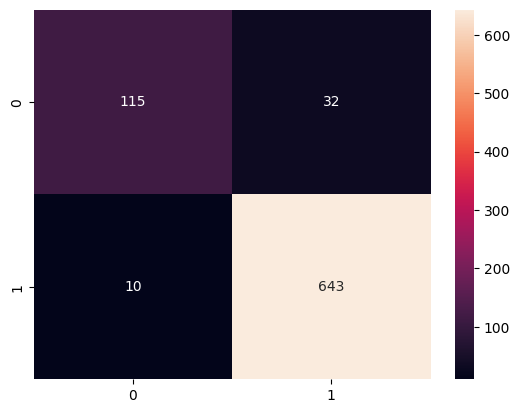

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

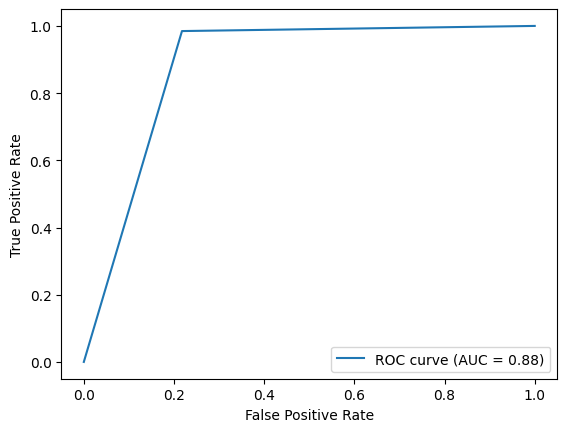

In [ ]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Create a new instance of the RandomForestRegressor
rfr = RandomForestRegressor()

# Define the parameter grid for the random search
random_grid = { # Replace with your desired parameter grid
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [None, 5, 10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # Add other parameters and their possible values here
}

# Now use 'rfr' instead of 'model' in RandomizedSearchCV
model_search = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, cv=5, verbose=2, n_jobs=-1)

print('Model Training...\n')
model_search.fit(X_train, y_train) # Fit the RandomizedSearchCV object
print('Training Completed !!!')

Model Training...

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Completed !!!


In [ ]:
print(f'Training Score - {(model_search.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model_search.score(X_test, y_test) * 100).round(2)}%')

Training Score - 94.6%
Testing Score  - 64.96%


In [ ]:
import pickle # Import the pickle module

pickle.dump(model_search, open('airplance_churn_model.pkl', 'wb')) # Now you can use pickle.dump